## Hotel Reviews - Sentiment Analysis

In [2]:
## Import all packages
## This branch is created based on the main branch
### Create a branch from a branch
#### Create another branch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import and Know the Dataset

In [59]:
## Load the dataset
df = pd.read_csv("/Users/yixuanli/repos/Exploratory-Data-Analysis/Sentiment-Analysis/Hotel-Reviews-Analysis/hotel_reviews.csv")
print("## The First 5 Rows ##", "\n")
df

## The First 5 Rows ## 



,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...
...,...,...,...,...,...,...,...
6996,6996,FabHotel F9 NSP,"North Delhi, New Delhi",Aug-23,I'd like to thank Manager.,10.0,"The room was good, comfortable and aesthetic \..."
6997,6997,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,Superb,9.0,good hotel
6998,6998,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,fabulous,10.0,good experience for me about hotel \nvery good...
6999,6999,FabHotel F9 NSP,"North Delhi, New Delhi",Jun-23,well done,10.0,well done


In [60]:
# Drop the index col
df.drop(["Index"], axis=1, inplace=True)

In [62]:
%reload_ext autoreload
%autoreload 2
from data_management import data_report
data_report(df, verbose=True)

No duplicated rows found. No changes were made.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4686 entries, 0 to 6991
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4686 non-null   object 
 1   Area               4686 non-null   object 
 2   Review_Date        4686 non-null   object 
 3   Rating_attribute   4686 non-null   object 
 4   Rating(Out of 10)  4686 non-null   float64
 5   Review_Text        4682 non-null   object 
dtypes: float64(1), object(5)
memory usage: 256.3+ KB
--------------------DATAFRAME INFO--------------------
##Raw Dataframe Info##
Row_num of the dataset: 4686
Col_num of the dataset: 6
Size of the dataset: 28116
##Dataframe Info##
##Null Data##
Name                 0
Area                 0
Review_Date          0
Rating_attribute     0
Rating(Out of 10)    0
Review_Text          4
##Number of Unique Values##
Name                  570
Area                   

### Exploratory Data Analysis

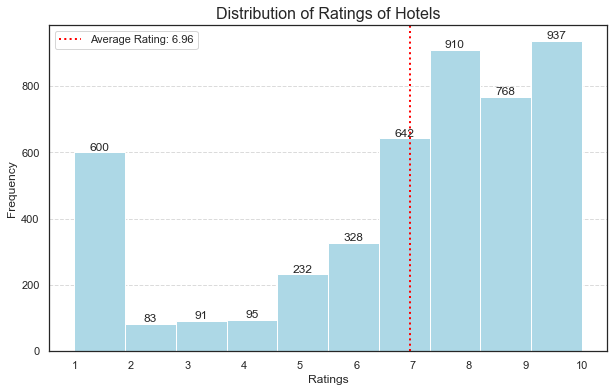

In [63]:
## Rating Analysis
sns.set(style = "white")

# Create a histogram
plt.figure(figsize = (10, 6))
n, bins, patches = plt.hist(df['Rating(Out of 10)'], bins = 10, color = 'lightblue')
average_rating = df['Rating(Out of 10)'].mean()

# Add labels and title
plt.xticks(range(int(min(bins)), int(max(bins)) + 1))
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings of Hotels', fontsize = 16)

# Annotate bars with data labels (values)
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    if y>0:
        plt.text(x, y, str(int(y)), ha='center', va='bottom')

plt.axvline(average_rating, color='red', linestyle='dotted', linewidth=2, label=f'Average Rating: {average_rating:.2f}')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()

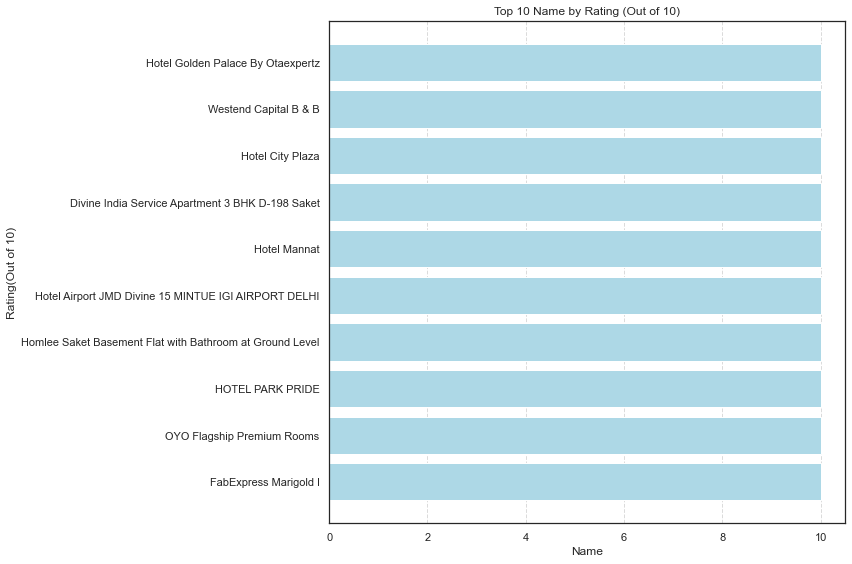

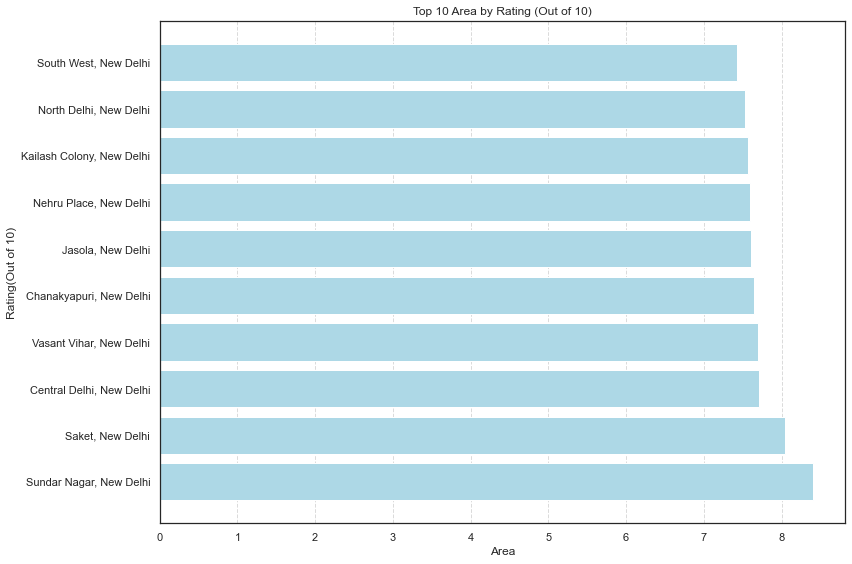

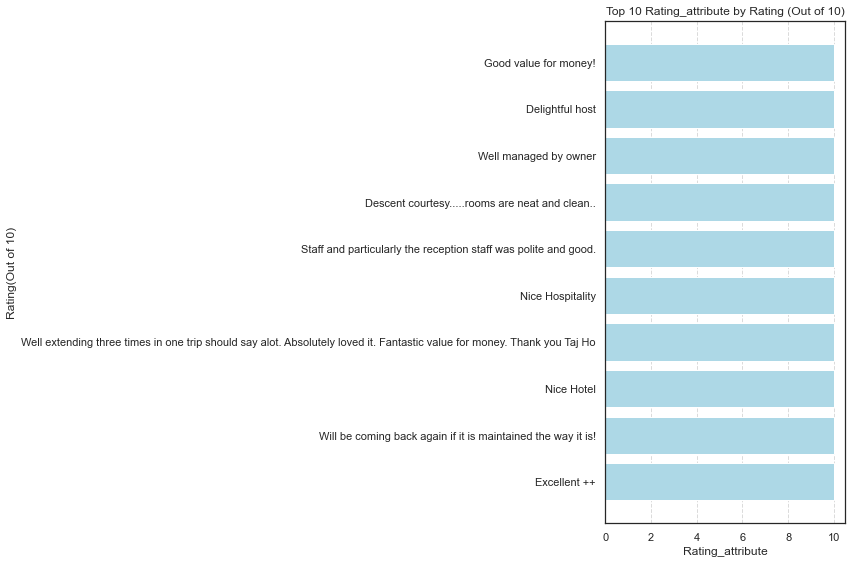

In [64]:
%reload_ext autoreload
%autoreload 2
from data_viz import bar_chart
bar_chart(df, "Name")
bar_chart(df, 'Area')
bar_chart(df, 'Rating_attribute')

### Sentiment Analysis

In [73]:
# Create a new dataframe only with review_text and rating
df_reviews = df[['Review_Text','Rating(Out of 10)']].copy()\
    .rename(columns = {"Review_Text": "text", "Rating(Out of 10)": "label"})
df_reviews


,text,label
0,Hotel the pearl is perfect place to stay in De...,9.0
1,Location of the hotel is perfect. The hotel is...,9.0
2,"Location, Indian food.",9.0
3,The location and the hotel itself is great. Ne...,9.0
4,Friendly and smiling staffs.. The reception st...,9.0
...,...,...
6987,Good response.couteous staff. Staff are taking...,8.0
6988,"Location is very good, walking distance from m...",8.0
6989,Nice staff .. really good and helpful people,8.0
6990,We booked a Deluxe room but since we wanted th...,7.0


In [74]:
# Drop null values
df_reviews = df_reviews.dropna()
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4682 entries, 0 to 6991
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    4682 non-null   object 
 1   label   4682 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.7+ KB


In [75]:
# Get frequency of each rating
df_reviews.label.value_counts()

10.0    937
8.0     909
9.0     768
7.0     640
1.0     600
6.0     327
5.0     232
4.0      95
3.0      91
2.0      81
2.5       1
7.9       1
Name: label, dtype: int64

In [82]:
# Set the rule for tags and generate a new column to tag the ratings
def comments(score):
    """
    The function returns sentiment value based on:
    label <= 3.0 -> Negative
    label > 3.0 and label < 7.0 -> Neutral
    label >= 7.0 -> Positive
    """
    if score <= 3.0:
        val = 'Negative'
    elif score >= 7.0:
        val = 'Positive'
    else:
        val = 'Neutral'
    return val

df_reviews['tag'] = df_reviews['label'].apply(comments)
df_reviews.head()

/var/folders/lg/0hjl0jc92m72n87mktfdm9b80000gn/T/ipykernel_10867/1211669740.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['tag'] = df_reviews['label'].apply(comments)


,text,label,tag
0,Hotel the pearl is perfect place to stay in De...,9.0,Positive
1,Location of the hotel is perfect. The hotel is...,9.0,Positive
2,"Location, Indian food.",9.0,Positive
3,The location and the hotel itself is great. Ne...,9.0,Positive
4,Friendly and smiling staffs.. The reception st...,9.0,Positive


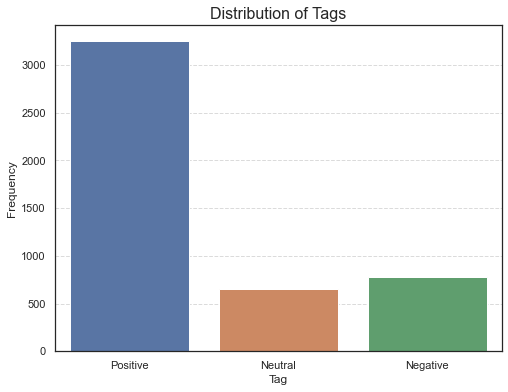

In [92]:
# Viz
plt.figure(figsize = (8,6))
sns.countplot(x = 'tag', data = df_reviews)

plt.title("Distribution of Tags", fontsize = 16)
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()